In [12]:
#Import library numpy, pandas dan scikit-learn dan untuk visualisasi
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Membaca Dataset dari File ke Pandas dataFrame
irisDataset = pd.read_csv('Dataset Iris.csv', delimiter=';', header=0)

In [14]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(irisDataset.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB
None


In [15]:
# Menghapus kolom "Id"
irisDataset = irisDataset.drop(labels="Id", axis=1)

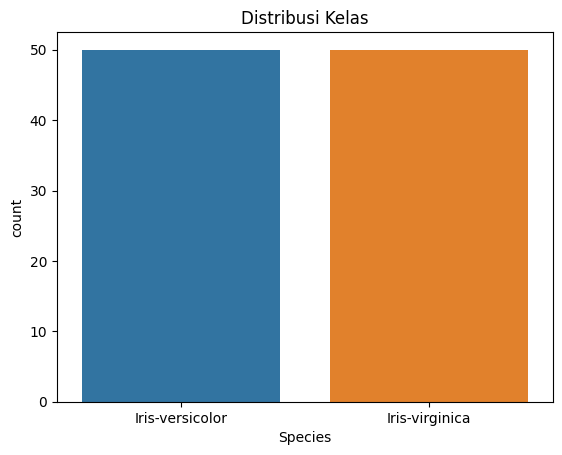

In [16]:
# Memvisualisasikan distribusi kelas
sns.countplot(x='Species', data=irisDataset)
plt.title("Distribusi Kelas")
plt.show()

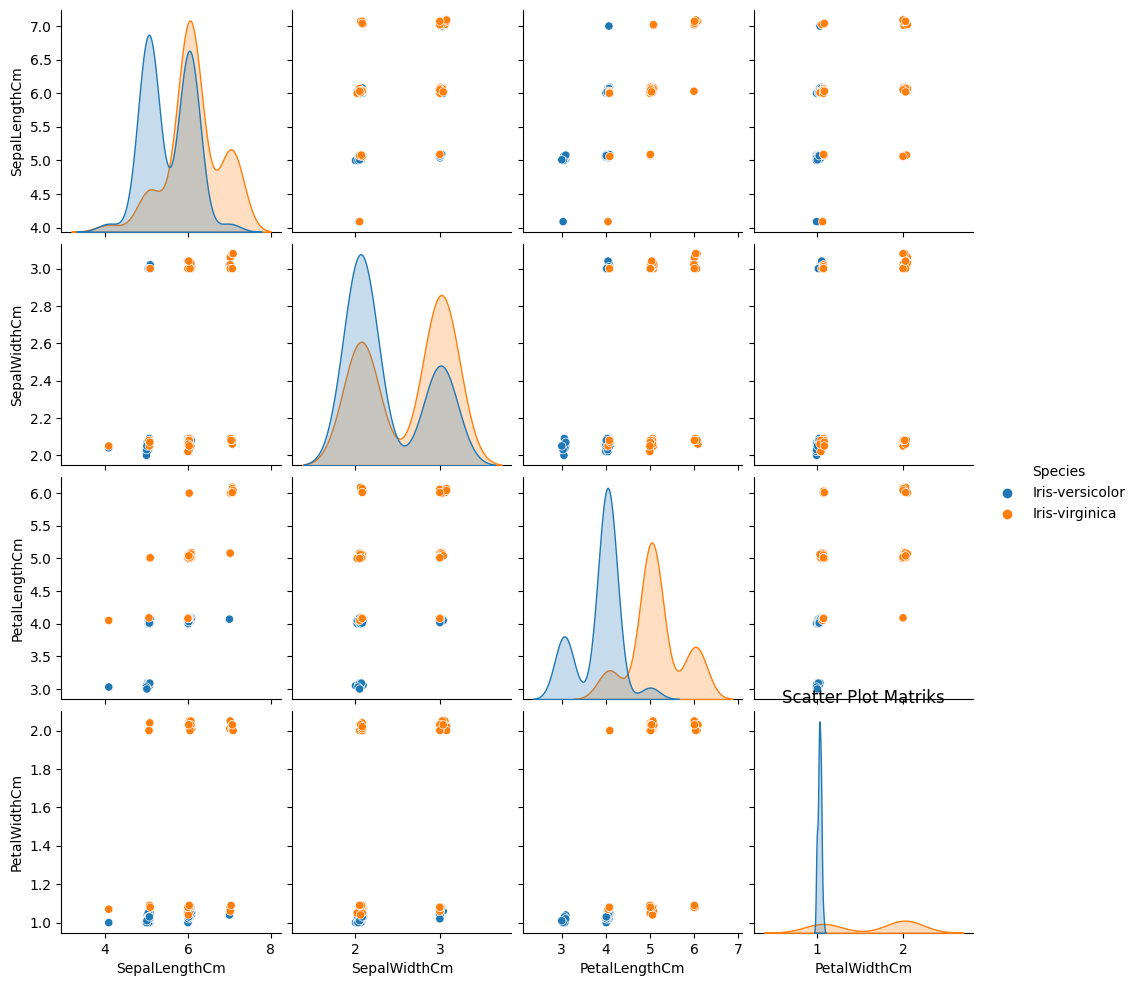

In [17]:
# Memvisualisasikan hubungan antar fitur menggunakan scatter plot matriks
sns.pairplot(irisDataset, hue='Species')
plt.title("Scatter Plot Matriks")
plt.show()

In [18]:
#Mengubah kelas (kolom "Species") dari String ke Unique-Integer
irisDataset["Species"] = pd.factorize(irisDataset.Species)[0]

In [19]:
#Mengubah dataFrame ke array Numpy
irisDataset = irisDataset.to_numpy()

In [20]:
#Membagi Dataset => 80 baris data untuk training dan 20 baris data untuk testing
dataTraining = np.concatenate((irisDataset[0:40, :], irisDataset[50:90, :]),
                              axis=0)
dataTesting = np.concatenate((irisDataset[40:50, :], irisDataset[90:100, :]),
                             axis=0)


In [21]:
#Memecah Dataset ke Input dan Label
inputTraining = dataTraining[:, 0:4]
inputTesting = dataTesting[:, 0:4]
labelTraining = dataTraining[:, 4]
labelTesting = dataTesting[:, 4]

In [22]:
#Mendefinisikan Decision Tree Classifier
model = tree.DecisionTreeClassifier()

In [23]:
#Mentraining Model
model = model.fit(inputTraining, labelTraining)

In [24]:
#Memprediksi Input Data Testing
hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya : ", labelTesting)
print("Hasil Prediksi : ", hasilPrediksi)

Label Sebenarnya :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hasil Prediksi :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
#Menghitung Akurasi
prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 20 data
Prediksi Salah : 0 data
Akurasi : 100.0 %
